In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statistics

import scipy
%matplotlib inline

In [2]:
# getting raw data
trial_data = []
debrief_data = []

for line in open('trials_data_p_all.json', 'r'):
    trial_data.append(json.loads(line))
for line in open('debriefs_data_p_all.json', 'r'):
    debrief_data.append(json.loads(line))

In [3]:
print(len(trial_data))

265


In [4]:
# transforming data into one dictionary with room as key and worker token_id as nested keys for their data
trial_data_room = {}
for trial in trial_data:
    id = trial["token_id"]
    room = trial["room"]
    if room not in trial_data_room.keys():
        trial_data_room[room] = {}
    if id not in trial_data_room[room].keys():
        trial_data_room[room][id] = []
    if trial not in trial_data_room[room][id]:
        trial_data_room[room][id].append(trial)

In [5]:
# checking how many workers completed the task together and computing their bonus. 
# appends details to a bash script that can be executed through aws from terminal  
boni = {}
rooms = list(trial_data_room.keys())
batch_results = pd.read_csv('batch_results_p_all.csv')
completion_pay = 3.50
# reduced data for participants that completed the task 
trial_data_completed = {}

# create bash script headline
with open ('bonus_results_p_all.sh', 'w') as rsh:
    bash = '''"#! /bin/bash"'''
    rsh.write(bash)
    
for room in rooms:
    if len(trial_data_room[room]) == 2:
        boni[room] = {}
        trial_data_completed[room] = {}
        tokens = list(trial_data_room[room].keys())
        for token in tokens:
            if len(trial_data_room[room][token]) == 5:
     
                boni[room][token] = 0
                trial_data_completed[room][token] = trial_data_room[room]
                for trial in range(0, len(trial_data_room[room][token])):
                    boni[room][token] += (sum(trial_data_room[room][token][trial]['posterior'][:4]) * 5 + (4 - sum(trial_data_room[room][token][trial]['posterior'][4:])))  / 100
                boni[room][token] = round(boni[room][token],2)
                print(token)
                if token != 'Jw9DOmVyloFjpcRXAAAJ':
                    print(batch_results[batch_results['Answer.surveycode']==token].index.item())
                    location = batch_results[batch_results['Answer.surveycode']==token].index.item()
   
                
                    worker_id = batch_results.loc[location, 'WorkerId']
                    assignment_id = batch_results.loc[location, 'AssignmentId']
                    bonus_amount = str(boni[room][token])
                    total_bonus = str(boni[room][token] + completion_pay)

                    with open ('bonus_results_p_all.sh', 'a') as rsh:
                        bash ="\naws mturk send-bonus --worker-id " + worker_id + " --bonus-amount " + total_bonus + " --assignment-id " + assignment_id + " --reason  '$3.50 completion pay + " + "$" + bonus_amount + " bonus for your performance during the Challenging Science Game hit'"
                        rsh.write(bash)
          

MtEvu0o0rASdzj0RAAAB
5
2EKEeW5nXgfElliSAAAC
0
M13t0_SqWkkfwBKJAAAG
7
r7iNHo-YDufvj4ttAAAF
12
E1SpkGS9NTgV8u12AAAR
11
ijO29Ey-fm1vE_ApAAAQ
9
xJIHTzH_6xnTxFlRAAAa
6
VpvPjmHNp4f3c7RjAAAZ
8
OmBy4yvY2pfWQmDgAAAK
51
qqrRkUjR9e24cK98AAAJ
45
S1Rl8ZLjGuV9clZWAAAM
21
rn_VRK5iLPgev9f8AAAN
34
kHHm-H0mTQUFgweSAAAP
35
6gZy2DmjWY9DADshAAAO
30
JT7ZAB7dPEXbWM9KAAAF
67
qTHpztkVBSdBm_UZAAAE
72
J2g8DxowwOB-gkR8AAAM
60
d9VaYpby-V6K-PGgAAAN
63
UoeEYonMQNivhGsyAAAG
90
bvS2n6FpsWwYieCFAAAF
85
uE7nz-KzP32pZvFkAAAM
91
2PSNytKkwqU4wHbjAAAN
81
m9nbP0jLatypuGK7AAAU
99
Ea3CVUwVovU8FL6dAAAV
105
mbxlKAX3Apq5f1McAAAD
121
plYxmbQkBrz0OYG7AAAC
113
KXmzl5-eGL_6YNxDAAAH
128
t87OKoupac3tspxNAAAG
118
VGhYt_ONT__ElPblAAAK
111
gWdvOGkG70-6oIcKAAAJ
115
NEwP-zFvkB8xPe2qAAAO
126
IdLU8lt87w--tMi-AAAN
123
Q7cj7QfSvrVQp4zyAAAP
125
rBqhQ3jC_fSvn8dPAAAQ
122
doNd8T8QMhErhgp5AAAL
143
UQIJo156uDVLjDEFAAAK
131
7ey5lg3pMFVpQce_AAAH
165
P5INvT1S-pUfBVIdAAAI
151
6dGY6eysj_-2bjNCAAAK
162
Jw9DOmVyloFjpcRXAAAJ
T3whPHkibRMFwKcJAAAN
168
JTLrmcM2

In [6]:
# creating a new data frame more convenient for analysis 
df_zendo = pd.DataFrame({"room": [], 
                         "token_id": [], 
                         "rule_name": [], 
                         "rule_description": [], 
                         "prior": [], 
                         "posterior": [], 
                         "prior_accuracy": [], 
                         "posterior_accuracy": [], 
                         "prior_feedback": [], 
                         "posterior_feedback": [],
                         "partner_data": [],
                         "data": []})


# rule details 
rules = ["Rule1", "Rule2", "Rule3", "Rule4", "Rule5", "Rule6", "Rule7", "Rule8", "Rule9", "Rule10"]
rule_names = ['Zeta' ,'Phi' ,'Upsilon' ,'Iota' ,'Kappa' ,'Omega' ,'Mu' ,'Nu' ,'Xi', 'Psi']
rule_descriptions = ['there is a red', 
                     'they are all the same size', 
                     'none are upright', 
                     'one is blue', 
                     'at least one is blue AND small', 
                     'all are blue OR small',
                     'a red is bigger than all nonreds', 
                     'contact', 
                     'blue to red contact', 
                     'stacked']

ground_truth = [True,True,True,True,False,False,False,False]

for room in list(trial_data_completed.keys()):
    for token in list(trial_data_completed[room]):
        if len(trial_data_completed[room][token][token]) == 5:
            trial_index = 0
            for trial in trial_data_completed[room][token][token]:
                if list(trial_data_completed[room]).index(token) == 0:
                    partner_token = list(trial_data_completed[room])[1]
                    partner_trial = trial_data_completed[room][partner_token][partner_token][trial_index]
                else:
                    partner_token = list(trial_data_completed[room])[0]
                    partner_trial = trial_data_completed[room][partner_token][partner_token][trial_index]
                
                rule_name = trial['rule']
                rule_description = rule_descriptions[rule_names.index(rule_name)]
                prior = trial['prior']
                prior_partner = partner_trial['prior']
                partner_data = partner_trial['data']
                trustworthy_q = trial['trustworthy_q']
                expertise_q = trial['expertise_q']
                
                posterior = trial['posterior']
                posterior_partner = partner_trial['posterior']
                prior_accuracy = (sum(prior[:4]) + (4 - sum(prior[4:]))) / len(prior)
                prior_accuracy_partner = (sum(partner_trial['prior'][:4]) + (4 - sum(partner_trial['prior'][4:]))) / len(partner_trial['prior'])
                posterior_accuracy = (sum(posterior[:4]) + (4 - sum(posterior[4:]))) / len(posterior)
                posterior_accuracy_partner = (sum(partner_trial['posterior'][:4]) + (4 - sum(partner_trial['posterior'][4:]))) / len(partner_trial['posterior'])
                prior_feedback = trial['ph4_answer']
                posterior_feedback = trial['ph5_answer']
                
                # getting stats on how generalisations of partner and subjects compare 
                prior_match = [a and b or not a and not b for a, b in zip(prior, partner_trial['prior'])]
                posterior_match = [a and b or not a and not b for a, b in zip(posterior, partner_trial['posterior'])]
                prior_match_perc = sum(prior_match) / len(prior_match)
                post_match_perc = sum(posterior_match) / len(posterior_match)
                prior_match_acc = sum([a and b and c or not a and not b and not c for a,b,c in zip(prior, partner_trial['prior'], ground_truth)]) / len(prior)
                post_match_acc = sum([a and b and c or not a and not b and not c for a,b,c in zip(posterior, partner_trial['posterior'], ground_truth)]) / len(prior)
                
                prior_alone_acc = sum([a and not b and c or not a and b and not c for a,b,c in zip(prior, partner_trial['prior'], ground_truth)]) / len(prior)
                post_alone_acc = sum([a and not b and c or not a and b and not c for a,b,c in zip(posterior, partner_trial['posterior'], ground_truth)]) / len(prior)
                prior_alone = [a and not b or not a and b for a,b in zip(prior, partner_trial['prior'])]
                posterior_alone = [a and not b or not a and b for a,b in zip(posterior, partner_trial['posterior'])]
                prior_alone_perc = sum(prior_alone) / len(prior_alone)
                post_alone_perc = sum(posterior_alone) / len(posterior_alone)
            
                # now checking how better player influenced the other player \n",
                if prior_accuracy >= prior_accuracy_partner:
                    delta_high_acc = posterior_accuracy - prior_accuracy
                    delta_low_acc = posterior_accuracy_partner - prior_accuracy_partner
                elif prior_accuracy < prior_accuracy_partner:
                    delta_high_acc = posterior_accuracy_partner - prior_accuracy_partner
                    delta_low_acc = posterior_accuracy - prior_accuracy

                prior_select_alone = [a and not b for a, b in zip(prior, partner_trial['prior'])]
                posterior_select_alone = [a and not b for a, b in zip(posterior, partner_trial['posterior'])]
                prior_select_other = [not a and b for a, b in zip(prior, partner_trial['prior'])]
                posterior_select_other = [not a and b for a, b in zip(posterior, partner_trial['posterior'])]
                accuracy_diff_prior = prior_accuracy - prior_accuracy_partner
                accuracy_diff_post = posterior_accuracy - posterior_accuracy_partner
                accuracy_change = prior_accuracy - posterior_accuracy
                accuracy_change_partner = prior_accuracy_partner - posterior_accuracy_partner
                data =  trial['data']
                
                
                df_zendo = df_zendo.append(pd.DataFrame({"room": [room], 
                                                         "token_id": [token], 
                                                         "rule_name": [rule_name], 
                                                         "rule_description": [rule_description], 
                                                         "prior": [prior], 
                                                         "prior_partner": [prior_partner],
                                                         "prior_match": [prior_match],
                                                         "prior_select_alone": [prior_select_alone],
                                                         "prior_select_other": [prior_select_other],
                                                         "posterior": [posterior], 
                                                         "posterior_partner": [posterior_partner],
                                                         "posterior_match": [posterior_match],
                                                         "posterior_select_alone": [posterior_select_alone],
                                                         "posterior_select_other": [posterior_select_other],
                                                         "prior_accuracy": [prior_accuracy], 
                                                         "posterior_accuracy": [posterior_accuracy], 
                                                         "prior_feedback": [prior_feedback], 
                                                         "posterior_feedback": [posterior_feedback],
                                                         "accuracy_diff_prior": [accuracy_diff_prior],
                                                         "accuracy_diff_post": [accuracy_diff_post],
                                                         "accuracy_change": [accuracy_change],
                                                         "accuracy_change_partner": [accuracy_change_partner],
                                                         "prior_match_perc": [prior_match_perc],
                                                         "posterior_match_perc": [post_match_perc],
                                                         "prior_match_acc": [prior_match_acc],
                                                         "posterior_match_acc": [post_match_acc],
                                                         "prior_alone_acc": [prior_alone_acc],
                                                         "posterior_alone_acc": [post_alone_acc],
                                                         "delta_low_acc": [delta_low_acc],
                                                         "delta_high_acc": [delta_high_acc],
                                                         "prior_alone_perc": [prior_alone_perc],
                                                         "posterior_alone_perc": [post_alone_perc],
                                                         "partner_data": [partner_data],
                                                          'expertise_q': [expertise_q],
                                                          "trustworthy_q": [trustworthy_q],
                                                         "data": [data]}), ignore_index=True, sort=False)
                trial_index += 1


                
# 
df_zendo.to_csv('main_data_formatted_cond_2_exptrust.csv')
print(df_zendo)

           room              token_id rule_name  \
0    p3GmbED9fU  MtEvu0o0rASdzj0RAAAB     Kappa   
1    p3GmbED9fU  MtEvu0o0rASdzj0RAAAB     Omega   
2    p3GmbED9fU  MtEvu0o0rASdzj0RAAAB      Zeta   
3    p3GmbED9fU  MtEvu0o0rASdzj0RAAAB      Iota   
4    p3GmbED9fU  MtEvu0o0rASdzj0RAAAB   Upsilon   
5    p3GmbED9fU  2EKEeW5nXgfElliSAAAC     Kappa   
6    p3GmbED9fU  2EKEeW5nXgfElliSAAAC     Omega   
7    p3GmbED9fU  2EKEeW5nXgfElliSAAAC      Zeta   
8    p3GmbED9fU  2EKEeW5nXgfElliSAAAC      Iota   
9    p3GmbED9fU  2EKEeW5nXgfElliSAAAC   Upsilon   
10   BtpIWWhmd0  M13t0_SqWkkfwBKJAAAG      Iota   
11   BtpIWWhmd0  M13t0_SqWkkfwBKJAAAG     Kappa   
12   BtpIWWhmd0  M13t0_SqWkkfwBKJAAAG      Zeta   
13   BtpIWWhmd0  M13t0_SqWkkfwBKJAAAG   Upsilon   
14   BtpIWWhmd0  M13t0_SqWkkfwBKJAAAG     Omega   
15   BtpIWWhmd0  r7iNHo-YDufvj4ttAAAF      Iota   
16   BtpIWWhmd0  r7iNHo-YDufvj4ttAAAF     Kappa   
17   BtpIWWhmd0  r7iNHo-YDufvj4ttAAAF      Zeta   
18   BtpIWWhmd0  r7iNHo-YDufvj4

[0.625, 0.5, 1.0, 0.625, 0.75]
[0.625, 0.625, 0.375, 0.75, 0.5]
[0.875, 0.75, 0.375, 0.875, 0.375]
[0.5, 0.375, 1.0, 0.75, 0.25]
[0.375, 0.625, 0.625, 0.375, 0.625]
[0.75, 1.0, 1.0, 0.375, 0.125]
[0.625, 0.625, 0.625, 0.625, 1.0]
[1.0, 1.0, 0.5, 0.625, 0.625]
[1.0, 0.375, 0.75, 0.25, 0.25]
[0.625, 0.5, 0.5, 1.0, 0.875]
[0.125, 0.75, 0.75, 0.375, 0.75]
[0.625, 0.375, 1.0, 0.625, 0.25]
[0.625, 1.0, 0.5, 0.75, 1.0]
[0.625, 1.0, 0.625, 0.625, 0.375]
[0.375, 0.5, 0.625, 0.625, 1.0]
[0.75, 1.0, 0.5, 0.75, 0.75]
[1.0, 0.625, 0.5, 0.625, 1.0]
[0.125, 0.75, 1.0, 0.625, 0.375]
[1.0, 0.5, 0.625, 0.75, 1.0]
[0.75, 0.25, 0.75, 0.5, 1.0]
[0.5, 0.75, 0.375, 0.375, 0.625]
[0.375, 0.375, 0.375, 0.375, 0.5]
[0.375, 0.625, 0.625, 0.625, 0.375]
[0.875, 0.5, 0.5, 0.75, 0.875]
[0.375, 0.375, 0.625, 0.625, 0.625]
[0.75, 0.875, 0.5, 1.0, 0.75]
[0.625, 0.5, 1.0, 1.0, 1.0]
[0.375, 0.375, 0.625, 0.625, 1.0]
[0.375, 0.625, 0.75, 0.75, 1.0]
[0.75, 0.625, 1.0, 0.375, 1.0]
[0.625, 0.125, 0.375, 0.125, 0.25]
[0.625, 

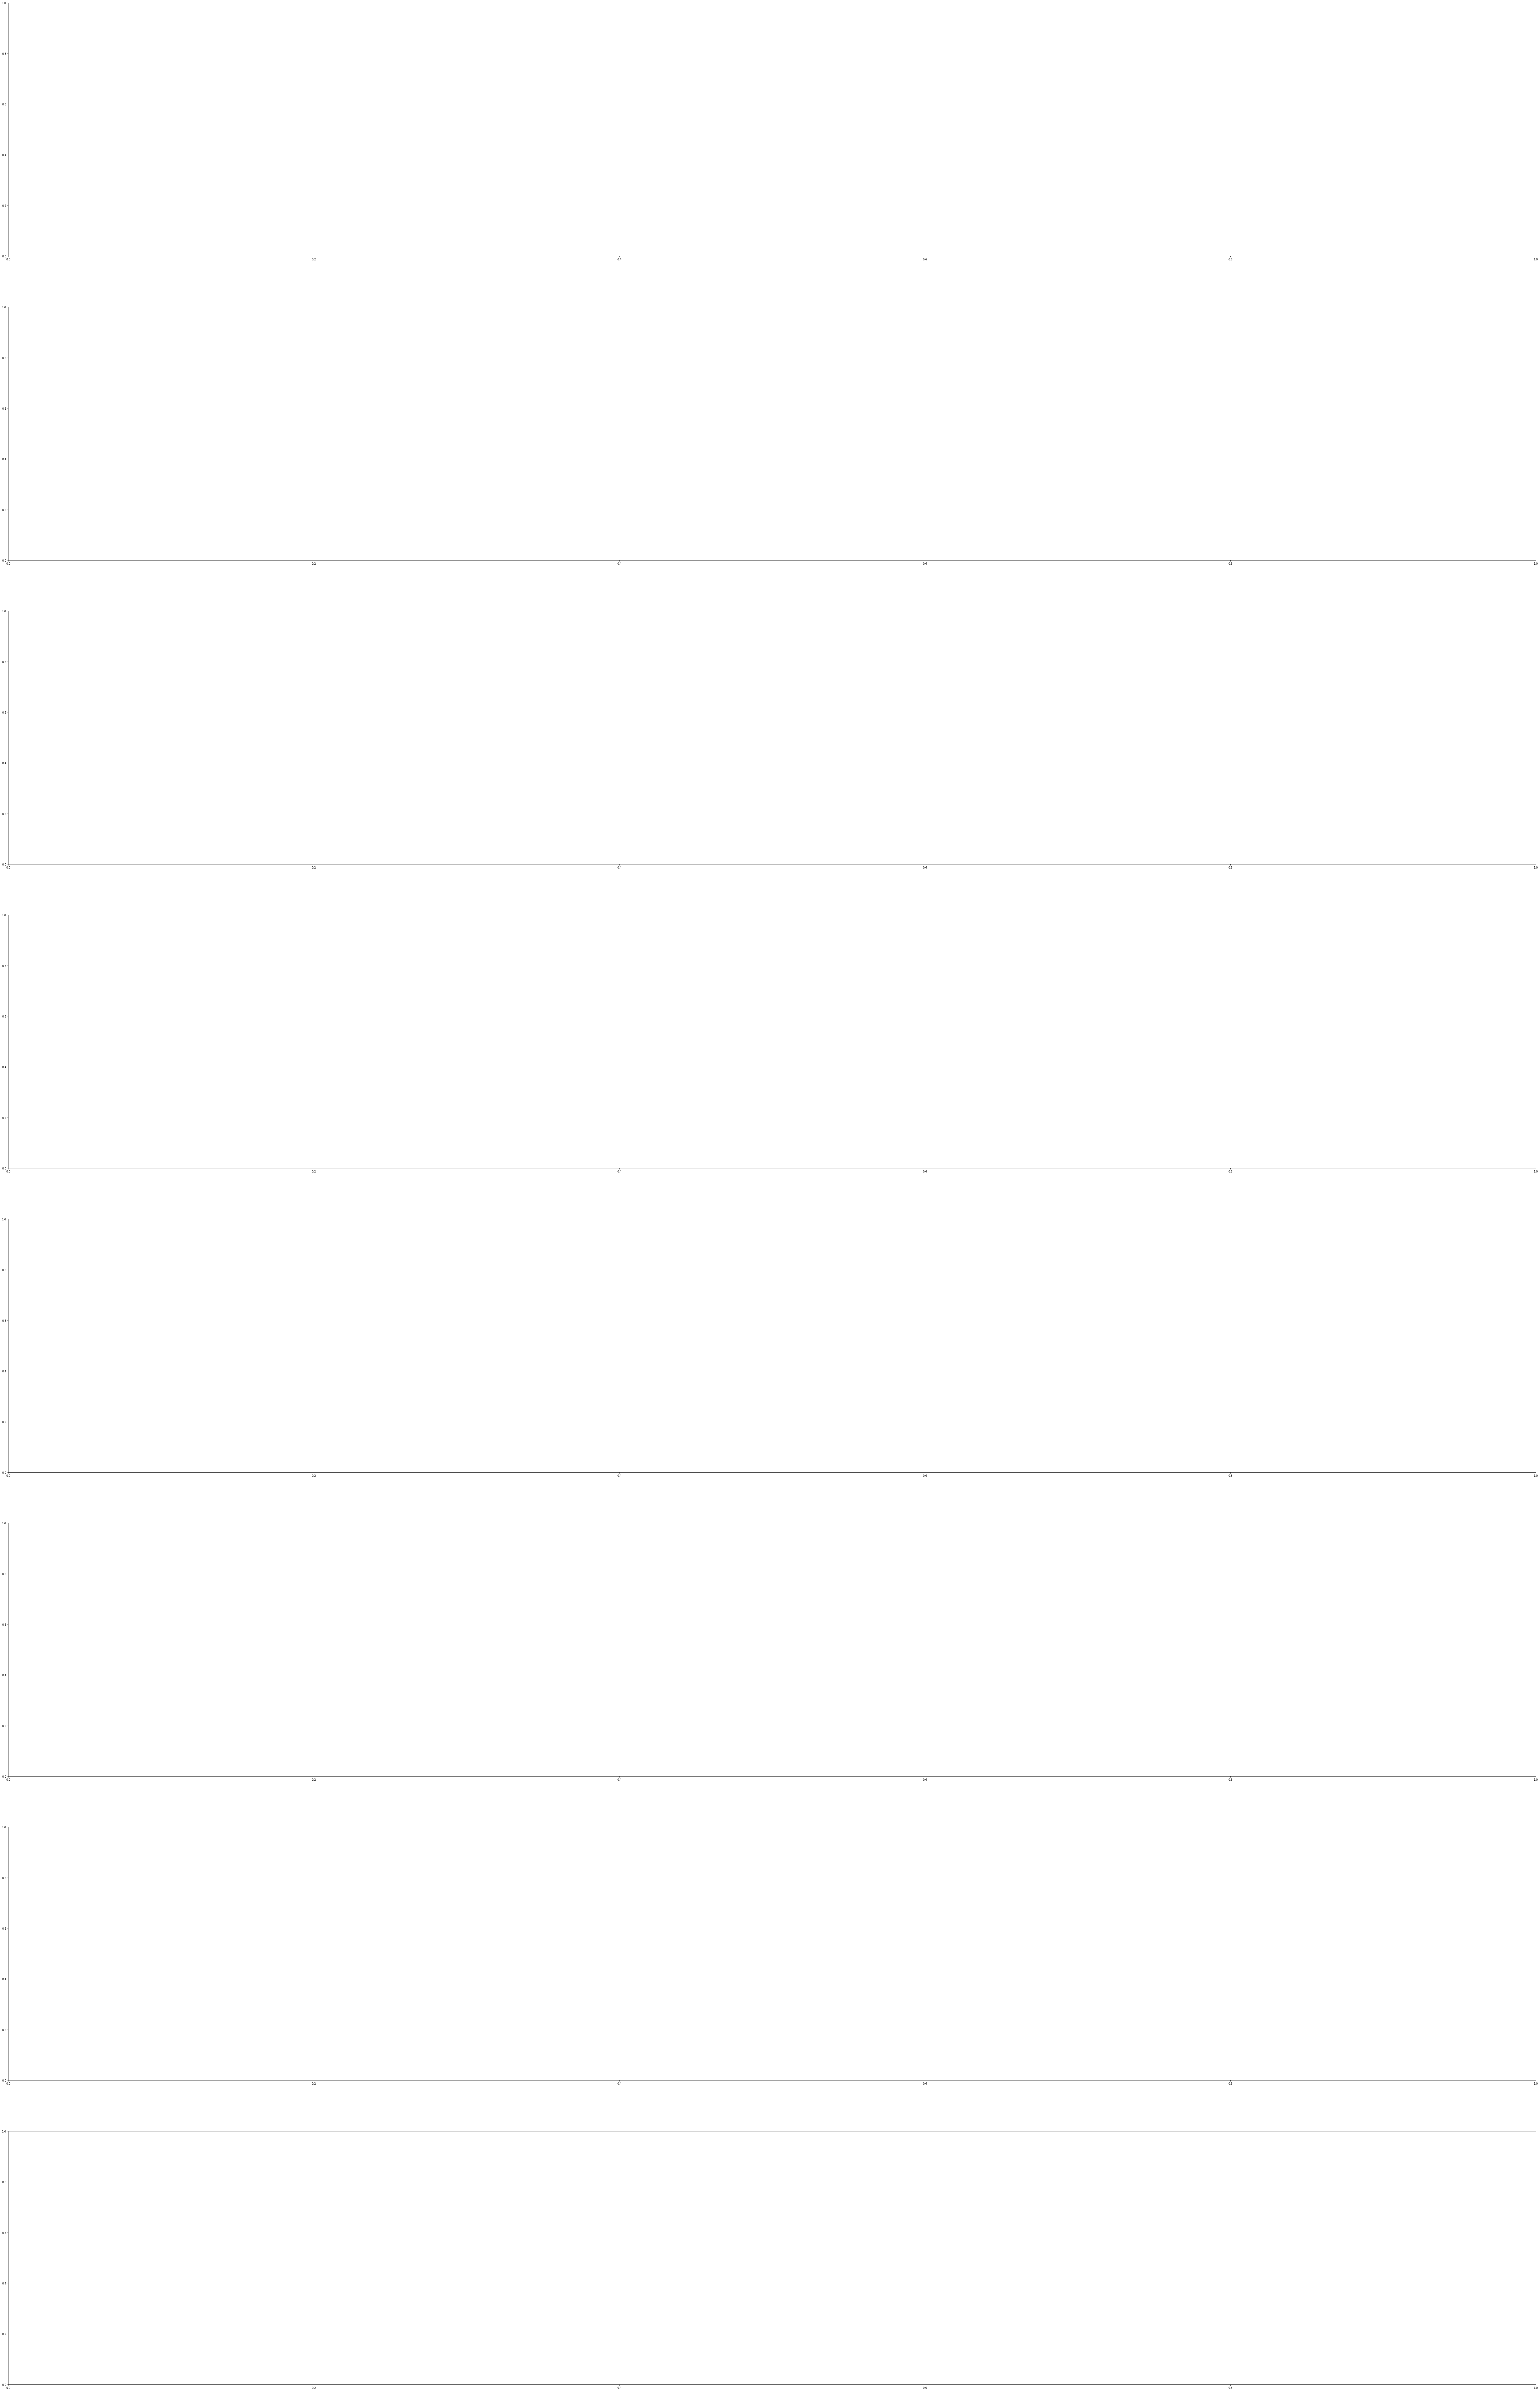

In [24]:
# plotting prior and posterior accuracy
token_ids = df_zendo['token_id']
token_ids = list(dict.fromkeys(token_ids))
# from matplotlib.backends.backend_pdf import PdfPages
# pp = PdfPages('multipage.pdf')


fig, ax = plt.subplots(8,1,figsize=(100,160))
x = np.arange(5)
width = 0.05

prior_acc_zeta = []
prior_acc_kappa = []
prior_acc_iota = []
prior_acc_omega = []
prior_acc_upsilon = []
post_acc_zeta = []
post_acc_kappa = []
post_acc_iota = []
post_acc_omega = []
post_acc_upsilon = []

  

prior_acc = []
feedback_1 = []
post_acc = []
feedback_2 = []
names = []
prior_match_perc = []
posterior_match_perc = []

prior_alone_perc = []
posterior_alone_perc = []

prior_match_acc = []
posterior_match_acc = []
prior_alone_acc = []
posterior_alone_acc = []

d_low_acc = []
d_high_acc = []
plt.rcParams.update({'font.size': 25})




for subj in range(0, 41):  
    names.append(df_zendo['rule_description'].loc[df_zendo['token_id'] == token_ids[subj]].tolist())
    prior_acc.append(df_zendo['prior_accuracy'].loc[df_zendo['token_id'] == token_ids[subj]].tolist())
    print(df_zendo['prior_accuracy'].loc[df_zendo['token_id'] == token_ids[subj]].tolist())
    feedback_1.append(df_zendo['prior_feedback'].loc[df_zendo['token_id'] == token_ids[subj]].tolist())
    feedback_2.append(df_zendo['posterior_feedback'].loc[df_zendo['token_id'] == token_ids[subj]].tolist())
    post_acc.append(df_zendo['posterior_accuracy'].loc[df_zendo['token_id'] == token_ids[subj]].tolist())
    prior_alone_perc.append(df_zendo['prior_alone_perc'].loc[df_zendo['token_id'] == token_ids[subj]].tolist())
    posterior_alone_perc.append(df_zendo['posterior_alone_perc'].loc[df_zendo['token_id'] == token_ids[subj]].tolist())
    prior_match_perc.append(df_zendo['prior_match_perc'].loc[df_zendo['token_id'] == token_ids[subj]].tolist())
    posterior_match_perc.append(df_zendo['posterior_match_perc'].loc[df_zendo['token_id'] == token_ids[subj]].tolist())
    prior_match_acc.append(df_zendo['prior_match_acc'].loc[df_zendo['token_id'] == token_ids[subj]].tolist())
    posterior_match_acc.append(df_zendo['posterior_match_acc'].loc[df_zendo['token_id'] == token_ids[subj]].tolist())
    prior_alone_acc.append(df_zendo['prior_alone_acc'].loc[df_zendo['token_id'] == token_ids[subj]].tolist())
    posterior_alone_acc.append(df_zendo['posterior_alone_acc'].loc[df_zendo['token_id'] == token_ids[subj]].tolist())
    
    d_low_acc.append(df_zendo['delta_low_acc'].loc[df_zendo['token_id'] == token_ids[subj]].tolist())
    d_high_acc.append(df_zendo['delta_high_acc'].loc[df_zendo['token_id'] == token_ids[subj]].tolist())
    
      
#     if df_zendo['rule_name'][subj] == 'Zeta':
#         prior_acc_zeta.append(df_zendo['prior_accuracy'][subj])
        
#         post_acc_zeta.append(df_zendo['posterior_accuracy'][subj])
#     elif df_zendo['rule_name'][subj] == 'Kappa':
#         prior_acc_kappa.append(df_zendo['prior_accuracy'][subj])
#         post_acc_kappa.append(df_zendo['posterior_accuracy'][subj])
#     elif df_zendo['rule_name'][subj] == 'Iota':
#         print(df_zendo['prior_accuracy'][subj])
#         print(df_zendo['posterior_accuracy'][subj])
#         prior_acc_iota.append(df_zendo['prior_accuracy'][subj])
#         post_acc_iota.append(df_zendo['posterior_accuracy'][subj])
#     elif df_zendo['rule_name'][subj] == 'Omega':
#         prior_acc_omega.append(df_zendo['prior_accuracy'][subj])
#         post_acc_omega.append(df_zendo['posterior_accuracy'][subj])
#     elif df_zendo['rule_name'][subj] == 'Upsilon':
#         prior_acc_upsilon.append(df_zendo['prior_accuracy'][subj])
#         post_acc_upsilon.append(df_zendo['posterior_accuracy'][subj])
# # #       
    
    
#     prior_a_rect = ax[subj].bar(x - 0.275, prior_acc[subj], width, label="prior_accuracy")
#     post_a_rect = ax[subj].bar(x - 0.225, post_acc[subj], width, label="posterior_accuracy")
#     prior_ap_rect = ax[subj].bar(x - 0.175, prior_alone_perc[subj], width, label="prior_alone_perc")
#     post_ap_rect = ax[subj].bar(x - 0.125, posterior_alone_perc[subj], width, label="post_alone_perc")
#     prior_mp_rect = ax[subj].bar(x - 0.075, prior_match_perc[subj], width, label="prior_union_perc")
#     post_mp_rect = ax[subj].bar(x - 0.025, posterior_match_perc[subj], width, label="post_union_perc")
#     prior_ap_a_rect = ax[subj].bar(x + 0.025, prior_alone_acc[subj], width, label="prior_alone_accuracy")
#     post_ap_a_rect = ax[subj].bar(x + 0.075, posterior_alone_acc[subj], width, label="post_alone_accuracy")
#     prior_mp_a_rect = ax[subj].bar(x + 0.125, prior_match_acc[subj], width, label="prior_union_accuracy")
#     post_mp_a_rect = ax[subj].bar(x + 0.175, posterior_match_acc[subj], width, label="posterior_union_accuracy")
#     d_low_a_rect = ax[subj].bar(x + 0.225, d_low_acc[subj], width, label="d_low_accuracy")
#     d_high_a_rect = ax[subj].bar(x + 0.275, d_high_acc[subj], width, label="d_high_accuracy")

    
    
    
#     ax[subj].set_ylabel('percentage', size=30, color="red")
#     ax[subj].set_title("id: " + token_ids[subj] + ", room: " + df_zendo['room'].loc[df_zendo['token_id'] == token_ids[subj]].tolist()[0], color="red", size=50)
#     ax[subj].set_xticks(x)
#     ax[subj].set_xticklabels(names[subj])
#     ax[subj].tick_params(axis='x', colors='red')
#     ax[subj].tick_params(axis='y', colors='red')
#     ax[subj].legend()
#     fig.tight_layout()
    

# plt.show()
for subj in range(0, len(df_zendo['token_id'])):
    if df_zendo['rule_name'][subj] == 'Zeta':
        prior_acc_zeta.append(df_zendo['prior_accuracy'][subj])
        post_acc_zeta.append(df_zendo['posterior_accuracy'][subj])
    elif df_zendo['rule_name'][subj] == 'Kappa':
        prior_acc_kappa.append(df_zendo['prior_accuracy'][subj])
        post_acc_kappa.append(df_zendo['posterior_accuracy'][subj])
    elif df_zendo['rule_name'][subj] == 'Iota':
        print(df_zendo['prior_accuracy'][subj])
        print(df_zendo['posterior_accuracy'][subj])
        prior_acc_iota.append(df_zendo['prior_accuracy'][subj])
        post_acc_iota.append(df_zendo['posterior_accuracy'][subj])
    elif df_zendo['rule_name'][subj] == 'Omega':
        prior_acc_omega.append(df_zendo['prior_accuracy'][subj])
        post_acc_omega.append(df_zendo['posterior_accuracy'][subj])
    elif df_zendo['rule_name'][subj] == 'Upsilon':
        prior_acc_upsilon.append(df_zendo['prior_accuracy'][subj])
        post_acc_upsilon.append(df_zendo['posterior_accuracy'][subj])
# #       
    




[[0.625, 0.375, 0.75, 0.25, 0.375], [0.625, 0.375, 0.75, 0.25, 0.375], [0.875, 0.625, 0.625, 0.125, 0.125], [0.875, 0.625, 0.625, 0.125, 0.125], [0.75, 0.625, 0.875, 0.5, 0.625], [0.75, 0.625, 0.875, 0.5, 0.625], [0.5, 0.75, 0.875, 0.5, 0.75], [0.5, 0.75, 0.875, 0.5, 0.75], [0.25, 0.75, 0.375, 0.875, 0.75], [0.25, 0.75, 0.375, 0.875, 0.75], [0.5, 0.75, 0.875, 0.75, 0.625], [0.5, 0.75, 0.875, 0.75, 0.625], [0.625, 1.0, 0.375, 0.75, 1.0], [0.625, 1.0, 0.375, 0.75, 1.0], [0.375, 0.625, 0.875, 0.875, 1.0], [0.375, 0.625, 0.875, 0.875, 1.0], [0.375, 0.75, 1.0, 0.75, 0.375], [0.375, 0.75, 1.0, 0.75, 0.375], [0.375, 0.625, 0.625, 0.75, 1.0], [0.375, 0.625, 0.625, 0.75, 1.0], [0.375, 0.625, 0.75, 0.75, 1.0], [0.375, 0.625, 0.75, 0.75, 1.0], [0.375, 0.625, 0.5, 0.625, 0.5], [0.375, 0.625, 0.5, 0.625, 0.5], [0.625, 0.625, 0.625, 0.625, 0.625], [0.625, 0.625, 0.625, 0.625, 0.625], [0.25, 0.625, 0.625, 0.625, 1.0], [0.25, 0.625, 0.625, 0.625, 1.0], [0.5, 1.0, 0.625, 0.5, 0.625], [0.5, 1.0, 0.625, 

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


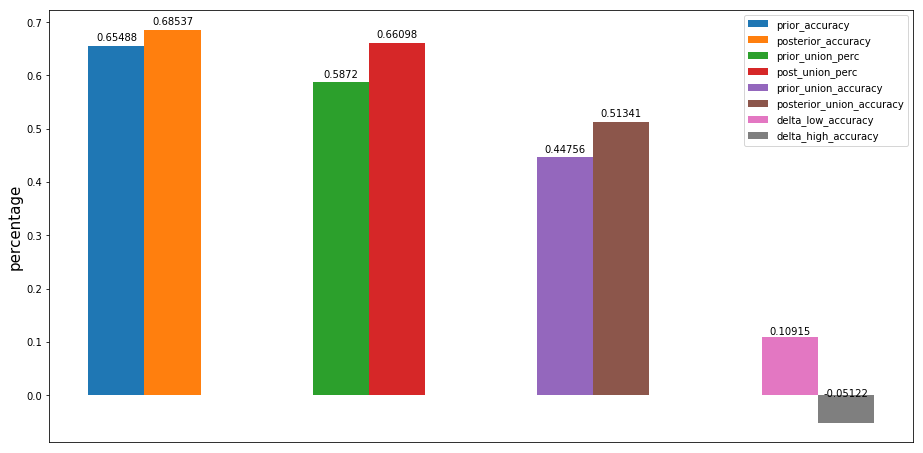

In [38]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_axes([0,0,1,1])
x = np.arange(1)
plt.rcParams.update({'font.size': 10})

width = 0.05
prior_a_rect = ax.bar(x - 0.225, np.mean(prior_acc), width, label="prior_accuracy")
post_a_rect = ax.bar(x - 0.175, np.mean(post_acc), width, label="posterior_accuracy")

# prior_ap_rect = ax.bar(x - 0.125, np.mean(prior_alone_perc), width, label="prior_alone_perc")
# post_ap_rect = ax.bar(x - 0.075, np.mean(posterior_alone_perc), width, label="post_alone_perc")
                      
prior_mp_rect = ax.bar(x - 0.025, np.mean(prior_match_perc), width, label="prior_union_perc")
post_mp_rect = ax.bar(x + 0.025, np.mean(posterior_match_perc), width, label="post_union_perc")

# prior_ap_a_rect = ax.bar(x + 0.075, np.mean(prior_alone_acc), width, label="prior_alone_accuracy")
# post_ap_a_rect = ax.bar(x + 0.125, np.mean(posterior_alone_acc), width, label="post_alone_accuracy")

prior_mp_a_rect = ax.bar(x + 0.175, np.mean(prior_match_acc), width, label="prior_union_accuracy")
post_mp_a_rect = ax.bar(x + 0.225, np.mean(posterior_match_acc), width, label="posterior_union_accuracy")

d_low_a_rect = ax.bar(x + 0.375, np.mean(d_low_acc), width, label="delta_low_accuracy")
d_high_a_rect = ax.bar(x + 0.425, np.mean(d_high_acc), width, label="delta_high_accuracy")

acc_values = [np.mean(prior_acc), 
              np.mean(post_acc),
              np.mean(prior_match_perc),
              np.mean(posterior_match_perc),
              np.mean(prior_match_acc),
              np.mean(posterior_match_acc),
              np.mean(d_low_acc),
              np.mean(d_high_acc)]

print(posterior_match_perc)
                       
rects = [prior_a_rect,
         post_a_rect,
         prior_mp_rect,
         post_mp_rect,
         prior_mp_a_rect,
         post_mp_a_rect,
         d_low_a_rect,
         d_high_a_rect]

def autolabel(rects, ind, sign = 1, mult=1.01):
   
    i = 0
    for rect in rects:
        height = rects[i].get_height()
        ax.text(rects[i].get_x() + rect.get_width()/2., mult*sign*height,
                round(acc_values[ind],5),
                ha='center', va='bottom')
        i+= 1

autolabel(rects[0],0)
autolabel(rects[1],1)
autolabel(rects[2],2)
autolabel(rects[3],3)
autolabel(rects[4],4)
autolabel(rects[5],5)
autolabel(rects[6],6)
autolabel(rects[7],7, sign = -1, mult=-0.105)


ax.set_ylabel('percentage', size=15, color="black")
plt.tick_params(
    axis='x',          # changes apply to the x-axis\n",
    which='both',      # both major and minor ticks are affected\n",
    bottom=False,      # ticks along the bottom edge are off\n",
    top=False,         # ticks along the top edge are off\n",
    labelbottom=False)
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
ax.legend()
fig.tight_layout()
plt.savefig('summary_res_exp_2.pdf')  


In [12]:
cat = {"V1":3,"V2":[1,5],"V3":[2,4],"V4":[3,0],"V5":2,"V6":[5,1]}
from statistics import mean
print(mean([acc for sublist in prior_acc for acc in sublist]))

0.6548780487804878


In [37]:
from scipy import stats 
print(post_match_perc)
stats.ttest_ind(prior_match_acc, post_match_acc)

0.375


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3506: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


Ttest_indResult(statistic=array([nan, nan, nan, nan, nan]), pvalue=array([nan, nan, nan, nan, nan]))

In [49]:
from statistics import stdev
print(np.mean(d_low_acc))
print(np.mean(d_high_acc))
print(post_match_perc)

print(stdev([acc for sublist in d_low_acc for acc in sublist]))
print(stdev([acc for sublist in d_high_acc for acc in sublist]))

0.10914634146341463
-0.05121951219512195
0.375
0.2222156214147988
0.17005903130152147


In [50]:
# from scipy import stats
# prior_acc_list = [acc for sublist in prior_acc for acc in sublist]
# post_acc_list = [acc for sublist in post_acc for acc in sublist]
print(stats.wilcoxon([acc for sublist in d_low_acc for acc in sublist],[acc for sublist in d_high_acc for acc in sublist]))
# print(stats.normaltest(prior_acc_list))
# print(stats.normaltest(post_acc_list))
# import seaborn as sns
# sns.distplot(prior_acc_list)
# sns.distplot(post_acc_list)

WilcoxonResult(statistic=1604.0, pvalue=3.5460727938552267e-13)


In [13]:
f = [True,True]
l = []
[l.append(1) for i in f if i is True]
print(l)

[1, 1]


[1.0, 0.375, 0.375, 1.0, 0.625, 0.125, 0.625, 1.0, 0.25, 0.875, 0.75, 1.0, 1.0, 1.0, 1.0, 0.75, 0.5, 1.0, 1.0, 1.0, 0.5, 0.375, 0.375, 0.875, 0.625, 1.0, 1.0, 0.625, 1.0, 1.0, 0.125, 1.0, 0.75, 0.75, 0.75, 0.625, 1.0, 0.375, 1.0, 1.0, 1.0, 0.625]


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


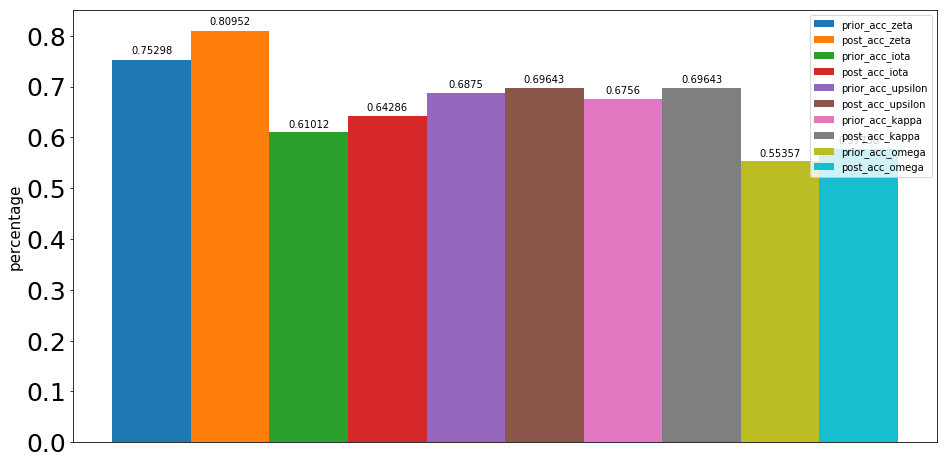

In [25]:
# specific rules 
fig = plt.figure(figsize=(12,6))
ax = fig.add_axes([0,0,1,1])
x = np.arange(1)
plt.rcParams.update({'font.size': 10})

width = 0.05
# print(len(prior_acc))
print(prior_acc_zeta)
acc_values = [np.mean(prior_acc_zeta), 
              np.mean(post_acc_zeta),
              np.mean(prior_acc_iota), 
              np.mean(post_acc_iota),
              np.mean(prior_acc_upsilon), 
              np.mean(post_acc_upsilon),
              np.mean(prior_acc_kappa), 
              np.mean(post_acc_kappa),
              np.mean(prior_acc_omega), 
              np.mean(post_acc_omega)]

prior_acc_zeta_rect = ax.bar(x - 0.225, np.mean(prior_acc_zeta), width, label="prior_acc_zeta")
post_acc_zeta_rect = ax.bar(x - 0.175, np.mean(post_acc_zeta), width, label="post_acc_zeta")

prior_acc_iota_rect = ax.bar(x - 0.125, np.mean(prior_acc_iota), width, label="prior_acc_iota")
post_acc_iota_rect = ax.bar(x - 0.075, np.mean(post_acc_iota), width, label="post_acc_iota")

prior_acc_upsilon_rect = ax.bar(x - 0.025, np.mean(prior_acc_upsilon), width, label="prior_acc_upsilon")
post_acc_upsilon_rect = ax.bar(x + 0.025, np.mean(post_acc_upsilon), width, label="post_acc_upsilon")

prior_acc_kappa_rect = ax.bar(x + 0.075, np.mean(prior_acc_kappa), width, label="prior_acc_kappa")
post_acc_kappa_rect = ax.bar(x + 0.125, np.mean(post_acc_kappa), width, label="post_acc_kappa")

prior_acc_omega_rect = ax.bar(x + 0.175, np.mean(prior_acc_omega), width, label="prior_acc_omega")
post_acc_omega_rect = ax.bar(x + 0.225, np.mean(post_acc_omega), width, label="post_acc_omega")


# print(prior_match_perc)


# print(acc_values)
                       
rects = [prior_acc_zeta_rect,
         post_acc_zeta_rect,
         prior_acc_iota_rect,
         post_acc_iota_rect,
         prior_acc_upsilon_rect,
         post_acc_upsilon_rect,
         prior_acc_kappa_rect,
         post_acc_kappa_rect,
         prior_acc_omega_rect,
         post_acc_omega_rect]


# print(rects)

def autolabel(rects, ind, sign = 1, mult=1.01):
   
    i = 0
    for rect in rects:
#         print('hi')
        height = rects[i].get_height()
        ax.text(rects[i].get_x() + rect.get_width()/2., mult*sign*height,
                round(acc_values[ind],5),
                ha='center', va='bottom')
        i+= 1

autolabel(rects[0],0)
autolabel(rects[1],1)
autolabel(rects[2],2)
autolabel(rects[3],3)
autolabel(rects[4],4)
autolabel(rects[5],5)
autolabel(rects[6],6)
autolabel(rects[7],7)
autolabel(rects[8],8)
autolabel(rects[9],9)



ax.set_ylabel('percentage', size=15, color="black")
plt.tick_params(
    axis='x',          # changes apply to the x-axis\n",
    which='both',      # both major and minor ticks are affected\n",
    bottom=False,      # ticks along the bottom edge are off\n",
    top=False,         # ticks along the top edge are off\n",
    labelbottom=False)
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
ax.legend()
fig.tight_layout()
plt.savefig('summary_res_exp_2_specific_rules.pdf')  


In [26]:
print(np.mean([.75,.61,.6875,.6756,.55]))

0.6546199999999999


In [15]:
import math
math.e**(.5/float('inf')) / (math.e**(.5/float('inf')) + math.e**((1-.5)/float('inf')))

0.5

In [16]:
math.e**(.5/100000) / (math.e**(.5/100000) + math.e**((1-.5)/100000))

0.5

In [17]:
df_zendo['rule_name'].value_counts()[0]
print(df_zendo['rule_name'].mode()[0])
print(isinstance(df_zendo['rule_name'].mode()[0], str))

Iota
True


In [18]:
e = [1,6]
d = [1,1]
print(e+d)

[1, 6, 1, 1]


In [20]:
print(len(prior_acc_iota))

8


In [72]:
dl =[i for sublist in d_low_acc for i in sublist]
dh =[i for sublist in d_high_acc for i in sublist]
pma =[i for sublist in prior_match_acc for i in sublist]
poma =[i for sublist in posterior_match_acc for i in sublist]
pmp =[i for sublist in prior_match_perc for i in sublist]
pomp =[i for sublist in posterior_match_perc for i in sublist]


print(stats.wilcoxon(pmp,pomp))
print(stats.wilcoxon(pma,poma))
print(stats.wilcoxon(dl,dh))
print(np.mean(pmp))
print(np.mean(pomp))
print(np.mean(pma))
print(np.mean(poma))
print(np.mean(dl))
print(np.mean(dh))

print(np.std(pmp))
print(np.std(pomp))
print(np.std(pma))
print(np.std(poma))
print(np.std(dl))
print(np.std(dh))

WilcoxonResult(statistic=607.0, pvalue=2.0794003525263947e-15)
WilcoxonResult(statistic=799.0, pvalue=1.0729432276924753e-08)
WilcoxonResult(statistic=831.0, pvalue=5.119757033789223e-12)
0.59125
0.71125
0.45875
0.5275
0.058125
-0.040625
0.2255929686404255
0.21042739246590497
0.23187752694040878
0.23088146309307725
0.1494142207923998
0.12179484543690672


0.59125


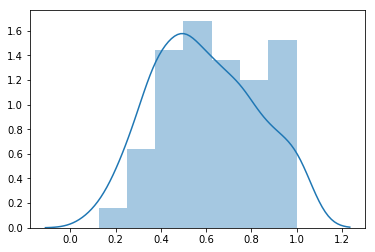

In [21]:
import seaborn as sns
sns.distplot(pmp)
print(np.mean(pmp))

0.71125


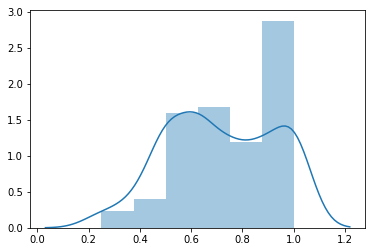

In [22]:
sns.distplot(pomp)
print(np.mean(pomp))

In [23]:
print(np.mean(pma))

0.45875


In [24]:
print(stats.mode(dl))
print(stats.mode(dh))

ModeResult(mode=array([0.]), count=array([117]))
ModeResult(mode=array([0.]), count=array([151]))


In [25]:
print([1,1,1,1,0,0,0,0] * 5)

[1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0]


ValueError: not enough values to unpack (expected 2, got 1)

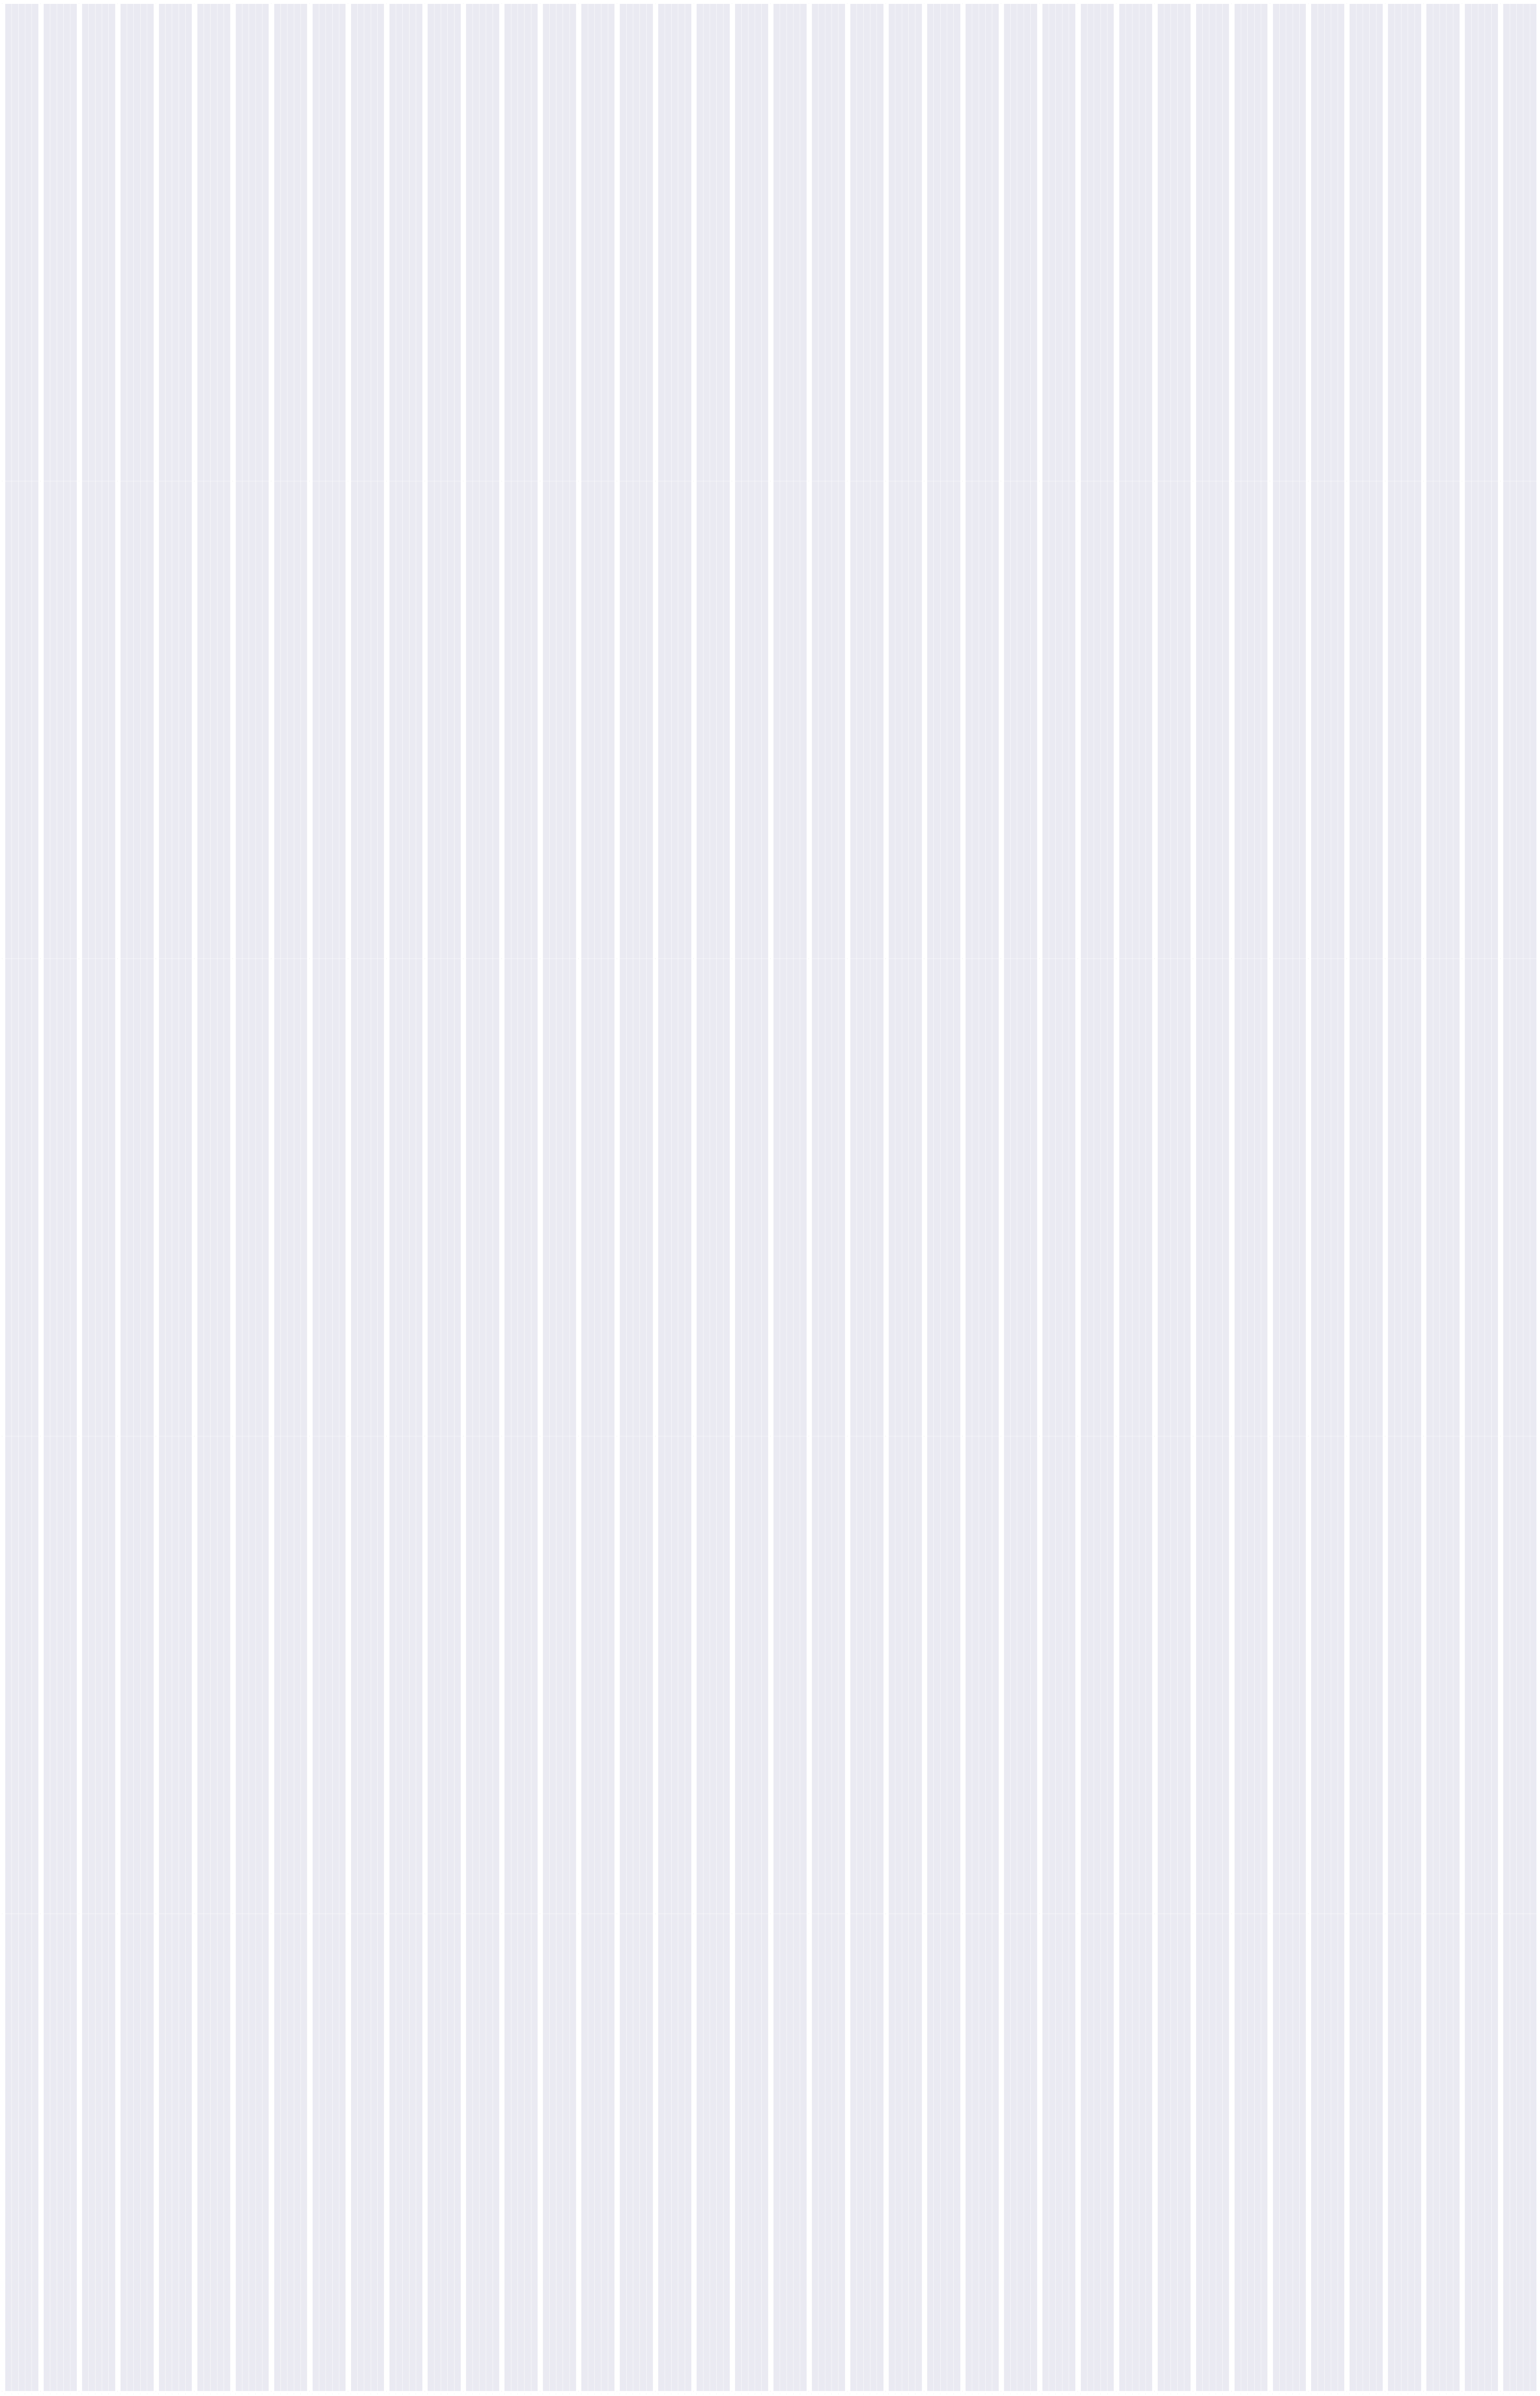

0.6277777777777778
0.2420451581541316
0.6555555555555556
0.22162166323751298
WilcoxonResult(statistic=124.5, pvalue=0.29932253830854694)
NormaltestResult(statistic=2.146591120340012, pvalue=0.3418799728254348)
NormaltestResult(statistic=0.23626417991254184, pvalue=0.8885786725444242)


TypeError: len() takes exactly one argument (0 given)

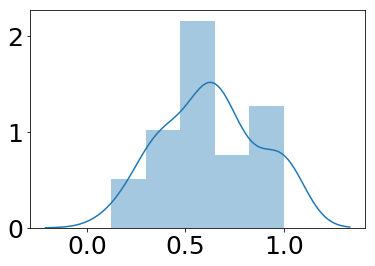

In [9]:
from scipy import stats
from statistics import mean, stdev 
prior_acc_list = []

post_acc_list = [acc for sublist in post_acc for acc in sublist]
print(mean(prior_acc_list))
print(stdev(prior_acc_list))
print(mean(post_acc_list))
print(stdev(post_acc_list))
print(stats.wilcoxon(prior_acc_list,post_acc_list))
print(stats.normaltest(prior_acc_list))
print(stats.normaltest(post_acc_list))
import seaborn as sns
sns.distplot(prior_acc_list)
# sns.distplot(post_acc_list)
print(len())

In [14]:
from statistics import mean, stdev
age = []
time = []
for i in debrief_data:
    age.append(i['age'])
    
print(mean(age))
print(stdev(age))
# print(mean(time))
# print(stdev(time))

35.30625
10.414670877990114
